**Customer Segmentation**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
#Identifying missing values and data types.
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used       

In [7]:
# Computes the percentage of missing values per column.
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing Values per Column:")
print(missing_df)


Missing Values per Column:
                        Missing Values  Percentage
Customer ID                          0         0.0
Age                                  0         0.0
Gender                               0         0.0
Item Purchased                       0         0.0
Category                             0         0.0
Purchase Amount (USD)                0         0.0
Location                             0         0.0
Size                                 0         0.0
Color                                0         0.0
Season                               0         0.0
Review Rating                        0         0.0
Subscription Status                  0         0.0
Shipping Type                        0         0.0
Discount Applied                     0         0.0
Promo Code Used                      0         0.0
Previous Purchases                   0         0.0
Payment Method                       0         0.0
Frequency of Purchases               0         0.0


No missing values were found.

 Customer ID is an ID that does not contribute to analysis since it’s unique for each customer and not useful for modeling.

In [8]:
if 'Customer ID' in df.columns:
    df.drop(columns=['Customer ID'], inplace=True)

In [9]:
# Data types and unique values for categorical columns.
print("\nCategorical Column Analysis:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")


Categorical Column Analysis:
Gender: 2 unique values
Item Purchased: 25 unique values
Category: 4 unique values
Location: 50 unique values
Size: 4 unique values
Color: 25 unique values
Season: 4 unique values
Subscription Status: 2 unique values
Shipping Type: 6 unique values
Discount Applied: 2 unique values
Promo Code Used: 2 unique values
Payment Method: 6 unique values
Frequency of Purchases: 7 unique values


In [10]:
# Descriptive statistics for numerical columns.
print("\nNumerical Column Analysis:")
print(df.describe())


Numerical Column Analysis:
               Age  Purchase Amount (USD)  Review Rating  Previous Purchases
count  3900.000000            3900.000000    3900.000000         3900.000000
mean     44.068462              59.764359       3.749949           25.351538
std      15.207589              23.685392       0.716223           14.447125
min      18.000000              20.000000       2.500000            1.000000
25%      31.000000              39.000000       3.100000           13.000000
50%      44.000000              60.000000       3.700000           25.000000
75%      57.000000              81.000000       4.400000           38.000000
max      70.000000             100.000000       5.000000           50.000000


- Age: Ranges from 18 to 70, with an average of 44 years.
- Purchase Amount (USD): Ranges from $20 to $100, with an average of $59.76.
- Review Rating: Ranges from 2.5 to 5, with an average of 3.75 whuch might suggest a positive feedback.
- Previous Purchases: Customers have made between 1 and 50 previous purchases, with a median of 25.

The Review Rating has a small standard deviation of 0.71, meaning ratings are clustered around the mean.
Purchase Amount and Previous Purchases have higher standard deviations, indicating more variation in customer behavior.

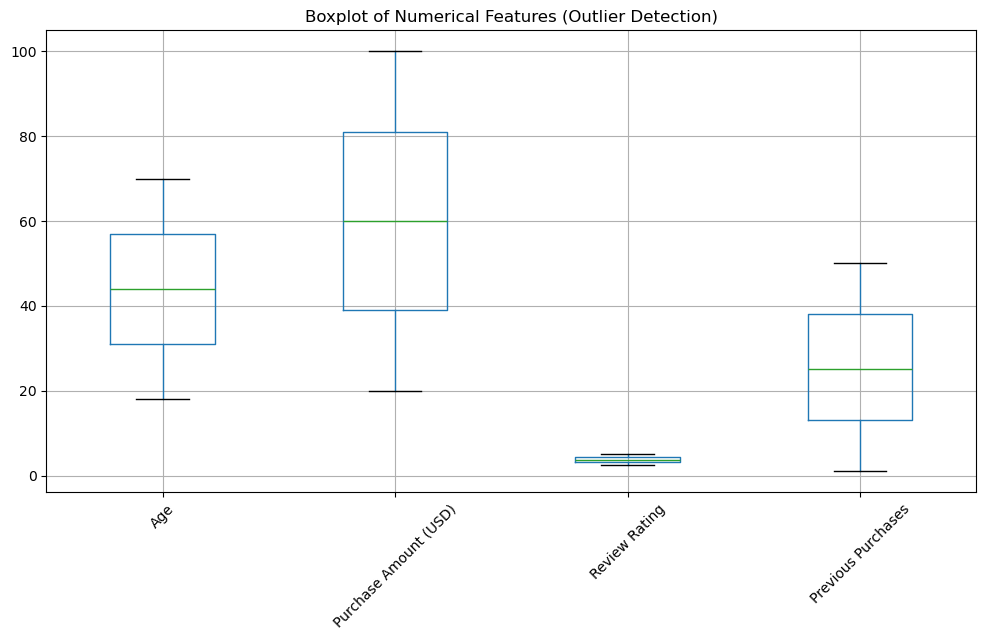

In [11]:
# Detecting outliers using boxplots.
plt.figure(figsize=(12, 6))
df.select_dtypes(include=['int64', 'float64']).boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features (Outlier Detection)")
plt.show()

- Age: No extreme outliers detected.
- Purchase Amount (USD): Some points extend possible indicating high-value purchases as outliers.
- Previous Purchases: The spread suggests potential outliers for customers with a very high number of past purchases.

If outliers significantly affect model performance, they might need to be transformed or removed.

Gender: 2 unique values
Item Purchased: 25 unique values
Category: 4 unique values
Location: 50 unique values
Size: 4 unique values
Color: 25 unique values
Season: 4 unique values
Subscription Status: 2 unique values
Shipping Type: 6 unique values
Discount Applied: 2 unique values
Promo Code Used: 2 unique values
Payment Method: 6 unique values
Frequency of Purchases: 7 unique values


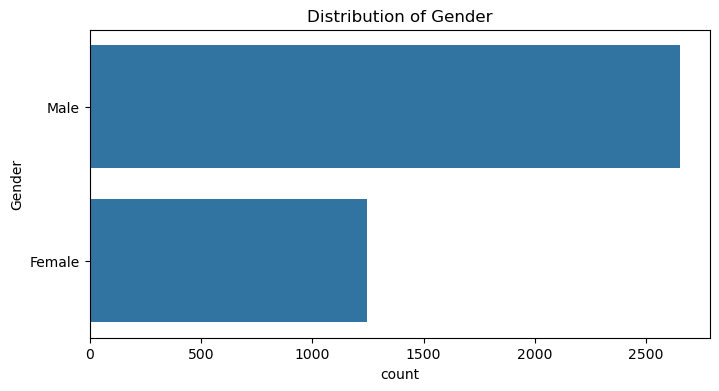

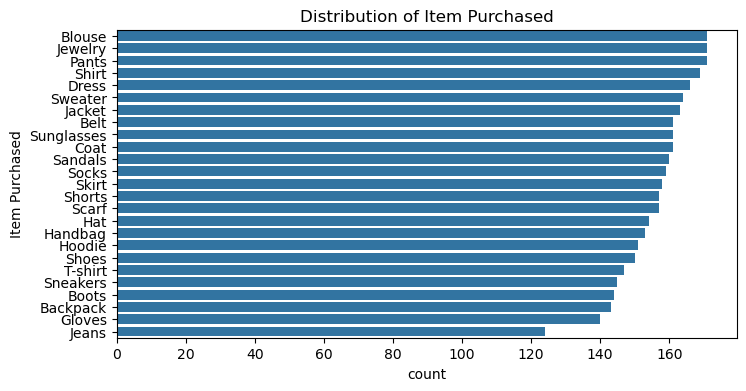

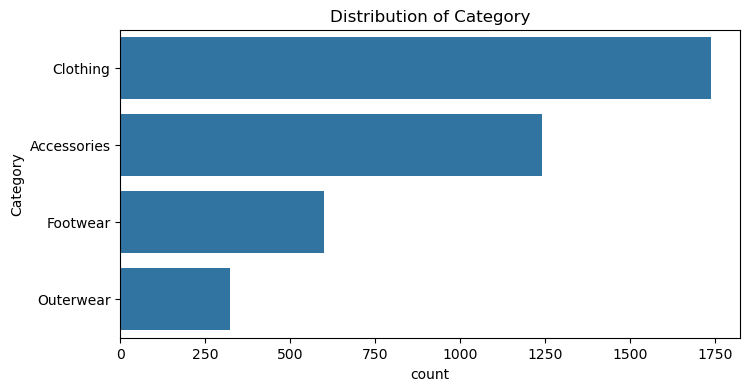

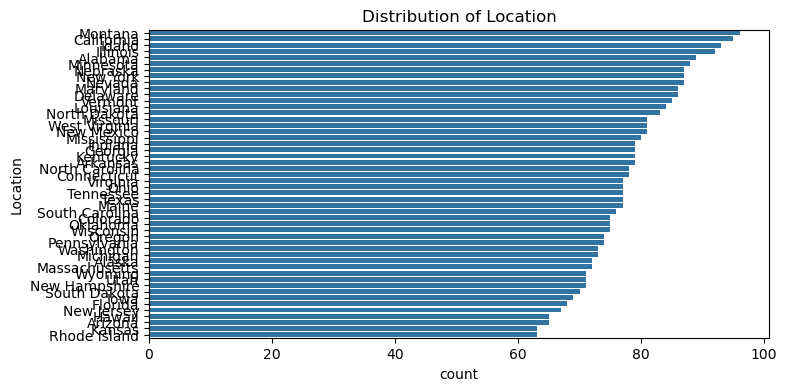

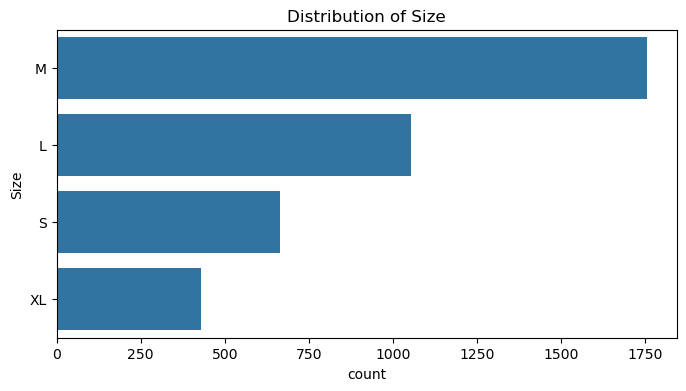

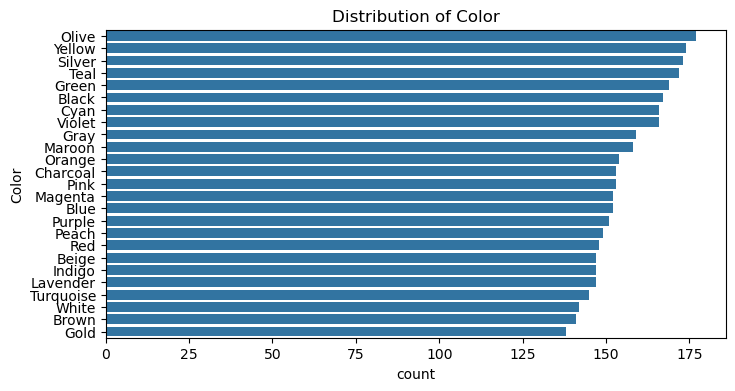

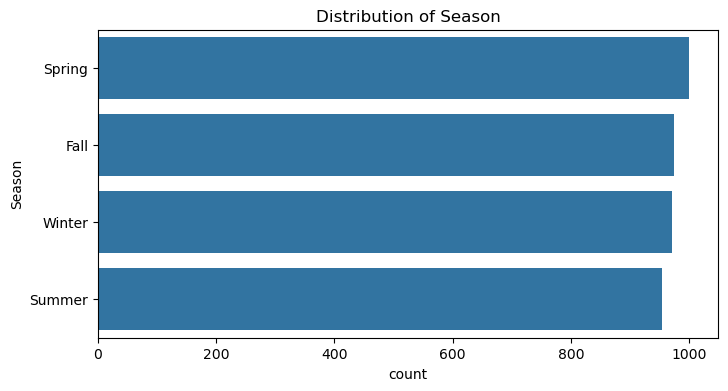

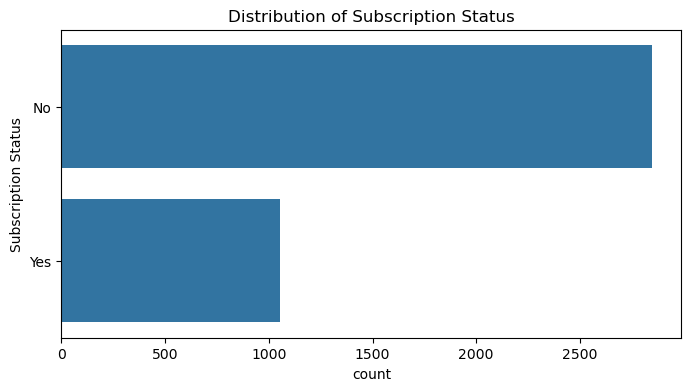

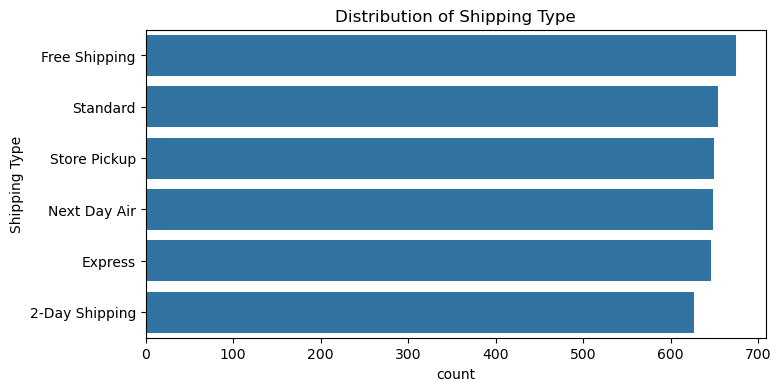

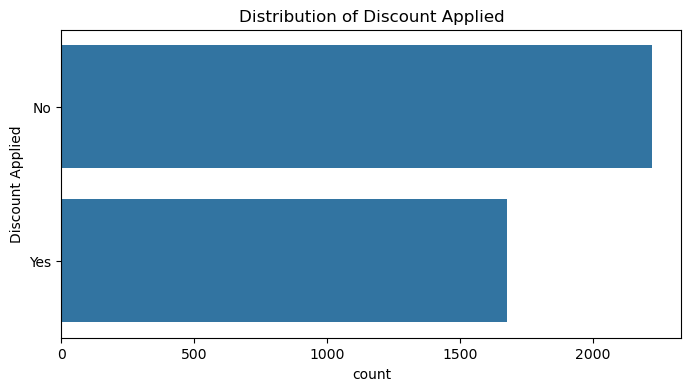

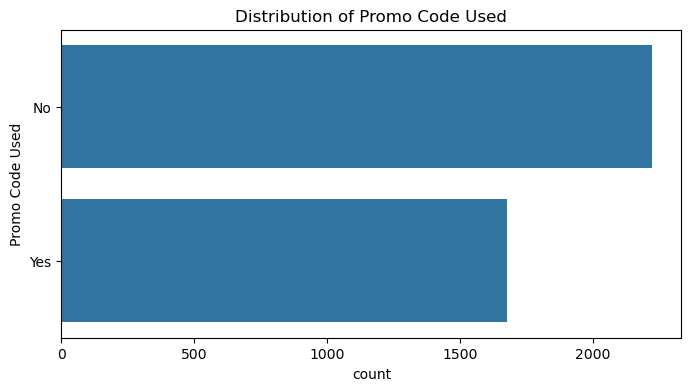

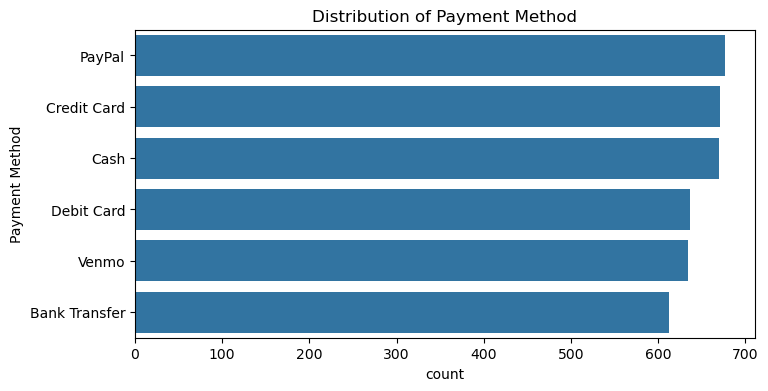

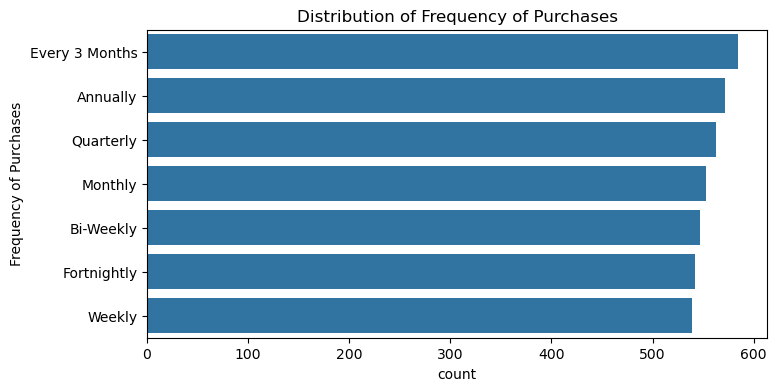

In [12]:
# Checking unique values for categorical columns and counting unique values.
for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df[col].nunique()} unique values")

for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

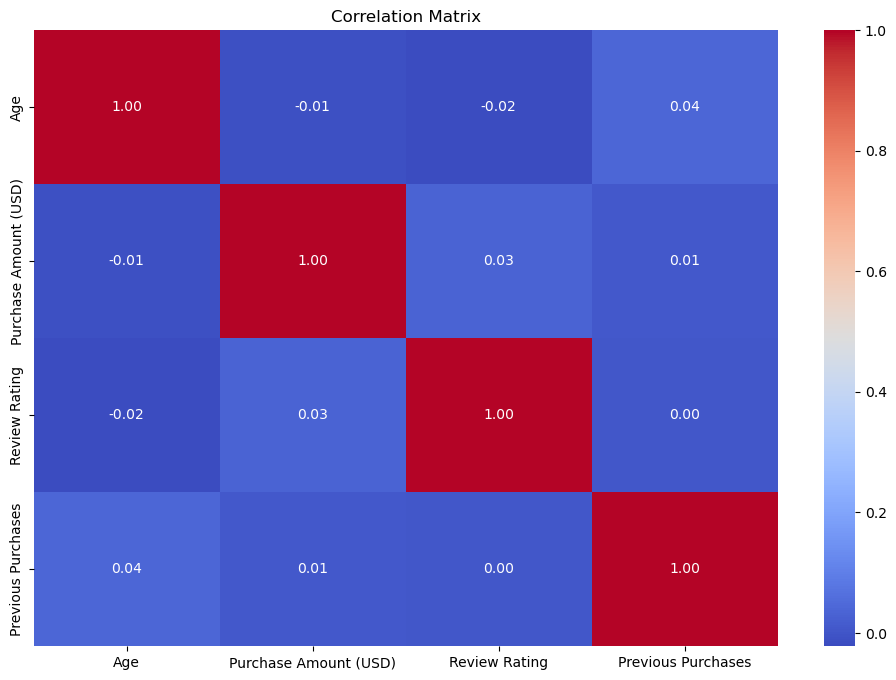

In [13]:
# Checking correlation between numerical variables.
numerical_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [14]:
skewness = df.select_dtypes(include=[np.number]).apply(lambda x: x.skew())
print("\nSkewness of Numerical Features:")
print(skewness)


Skewness of Numerical Features:
Age                     -0.006380
Purchase Amount (USD)    0.012702
Review Rating            0.004525
Previous Purchases       0.003121
dtype: float64


There is no strong correlations between the numerical variables. The highest correlation is to 0.03, meaning variables are independent.
Creating new features might improve model performance.

In [15]:
# Checking if a 'target' column exists
if 'target' in df.columns:
    print("Target Variable Distribution:")
    print(df['target'].value_counts())
else:
    print("No explicit target column found. Likely an unsupervised task.")

No explicit target column found. Likely an unsupervised task.


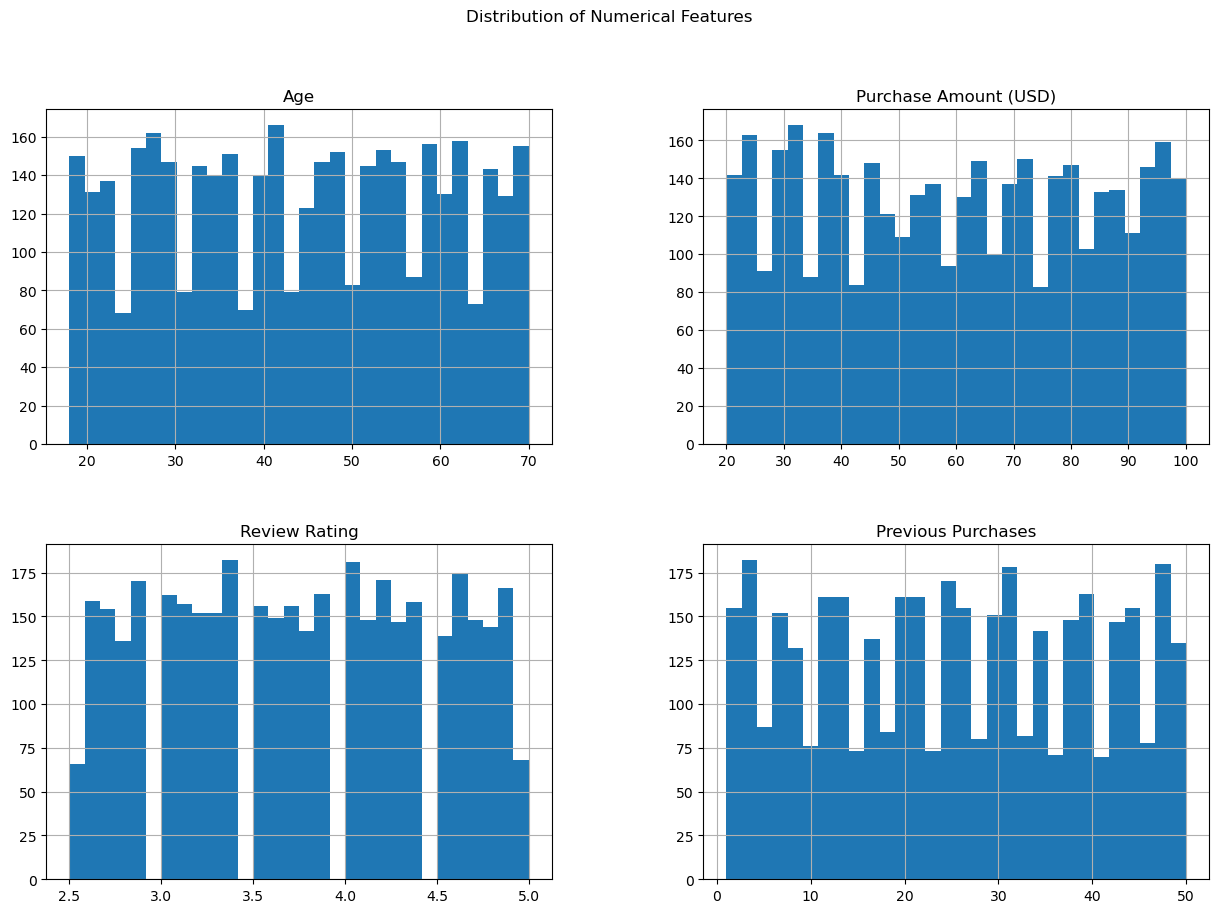

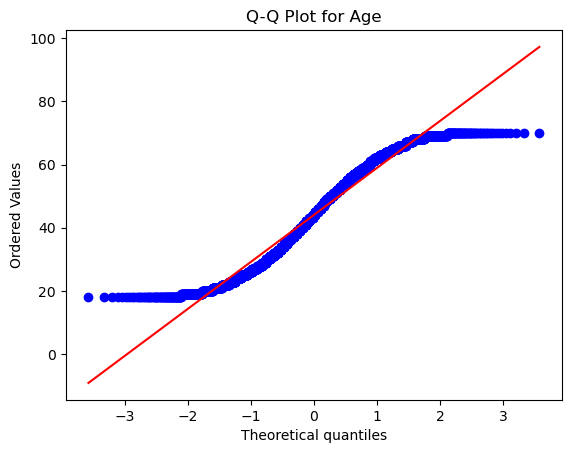

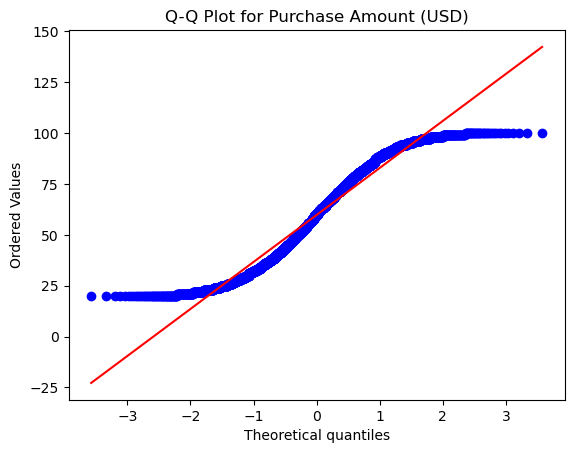

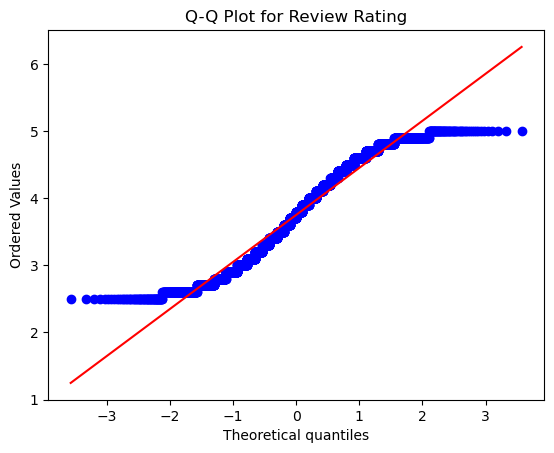

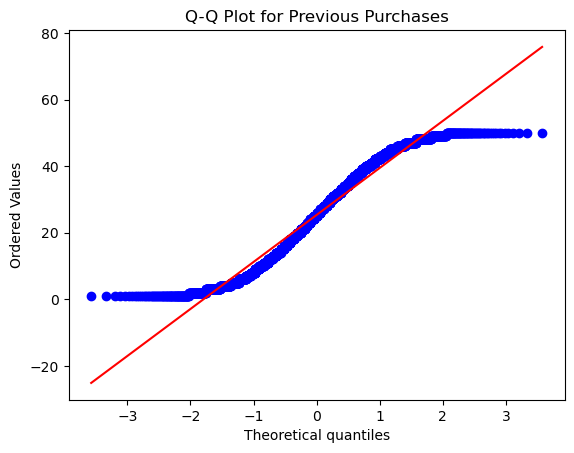

In [16]:
import scipy.stats as stats

# Plot histograms
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Checking normality of key numerical variables
for col in df.select_dtypes(include=np.number).columns:
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.show()

- Age: The distribution is uniform which suggets that customers from all age groups make purchases.
- Purchase Amount (USD): The data is evenly spread, meaning customers make purchases across different price ranges.
- Review Rating: A multi-modal distribution, likely due to customers giving whole number ratings.
- Previous Purchases: The distribution shows some skew, meaning some customers have made significantly more purchases than others.

From the age distribution we could suggest that targeting customers of all ages is viable.
From the purchase amount histogram we can infer that the spending behavior is quite balanced.

In [17]:
# Identifying possible transformations
# Check categorical encoding necessity
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_cols)

# Example: One-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=np.number)), columns=df.select_dtypes(include=np.number).columns)
print(df_scaled.head())

Categorical Columns: Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')
        Age  Purchase Amount (USD)  Review Rating  Previous Purchases
0  0.718913              -0.285629      -0.907584           -0.785831
1 -1.648629               0.178852      -0.907584           -1.616552
2  0.390088               0.558882      -0.907584           -0.162789
3 -1.517099               1.276716      -0.349027            1.637107
4  0.061263              -0.454531      -1.466141            0.391025


In [18]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [19]:
class DataPreprocessor:
	def preprocess_data(self, df):
		# Example preprocessing steps
		df = df.copy()
		df.dropna(inplace=True)  # Drop missing values
		df = pd.get_dummies(df, drop_first=True)  # One-hot encode categorical variables
		return df

preprocessor = DataPreprocessor()

# Preprocess the data
df_processed = preprocessor.preprocess_data(df)

# Check the shape of processed data
print("Original data shape:", df.shape)
print("Processed data shape:", df_processed.shape)

# Display first few rows of processed data
print("\nFirst few rows of processed data:")
print(df_processed.head())

Original data shape: (3900, 17)
Processed data shape: (3900, 130)

First few rows of processed data:
   Age  Purchase Amount (USD)  Review Rating  Previous Purchases  Gender_Male  \
0   55                     53            3.1                  14         True   
1   19                     64            3.1                   2         True   
2   50                     73            3.1                  23         True   
3   21                     90            3.5                  49         True   
4   45                     49            2.7                  31         True   

   Item Purchased_Belt  Item Purchased_Blouse  Item Purchased_Boots  \
0                False                   True                 False   
1                False                  False                 False   
2                False                  False                 False   
3                False                  False                 False   
4                False                   True            

The preprocessing pipeline will:

- Remove outliers from numerical features.
- Handle any missing values in the future.
- Transform features for easier interpretation.
- Create dummy variables for the categorical features.
- Scale numerical features.
- Select relevant features based on variance and uniqueness.

Feature Selection

Feature Engenieering

In [20]:
# Converting datetime columns to useful features
if "Timestamp" in df.columns: # Example: Extracting year, month, day, and hour from a timestamp
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    df["Year"] = df["Timestamp"].dt.year
    df["Month"] = df["Timestamp"].dt.month
    df["Day"] = df["Timestamp"].dt.day
    df["Hour"] = df["Timestamp"].dt.hour
    df.drop(columns=["Timestamp"], inplace=True)

# Binning "Age" into categories
if "Age" in df.columns:
    df["Age_Group"] = pd.cut(df["Age"], bins=[0, 18, 30, 50, 100], labels=["Teen", "Young", "Middle", "Senior"])
    df.drop(columns=["Age"], inplace=True)

In [21]:
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder

# Log transform skewed numerical features
numeric_features = df.select_dtypes(include=[np.number]).columns
skewness = df[numeric_features].apply(lambda x: skew(x.dropna()))
skewed_features = skewness[skewness > 1].index  # Filter features with high skewness
df[skewed_features] = np.log1p(df[skewed_features])  # Apply log(1 + x) transformation

# Convert categorical variables using Label Encoding
categorical_features = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

In [22]:
# Normalize numerical features using MinMaxScaler() for min-max normalization.
scaler = StandardScaler()  
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("Processed Data Sample:")
print(df.head())

df.to_csv("processed_customer_retail.csv", index=False)

Processed Data Sample:
     Gender  Item Purchased  Category  Purchase Amount (USD)  Location  \
0  0.685994       -1.394144 -0.002002              -0.285629 -0.576399   
1  0.685994        1.523236 -0.002002               0.178852 -0.436944   
2  0.685994       -0.143839 -0.002002               0.558882 -0.297488   
3  0.685994        0.272930  1.113356               1.276716  0.957614   
4  0.685994       -1.394144 -0.002002              -0.454531  0.818159   

       Size     Color    Season  Review Rating  Subscription Status  \
0 -1.203814 -0.707620  1.349198      -0.907584             1.644294   
1 -1.203814 -0.015163  1.349198      -0.907584             1.644294   
2  0.945854 -0.015163 -0.441163      -0.907584             1.644294   
3 -0.128980 -0.015163 -0.441163      -0.349027             1.644294   
4 -0.128980  1.231259 -0.441163      -1.466141             1.644294   

   Shipping Type  Discount Applied  Promo Code Used  Previous Purchases  \
0      -0.892178          1.15

Feature Selection:
- Drops irrelevant column of "Customer ID".

Feature Engineering:
- Extracting year, month, day, and hour from datetime columns.
- Discretized the age into categories.
- Log transformed highly skewed features.
- Encoded categorical variables using Label Encoding.

Feature Scaling:
- Standardized numerical features.

In [23]:
# New column 'total_spending_per_id'
df['total_spending_per_id'] = df['Purchase Amount (USD)'] * df['Previous Purchases']

print(df.head())

     Gender  Item Purchased  Category  Purchase Amount (USD)  Location  \
0  0.685994       -1.394144 -0.002002              -0.285629 -0.576399   
1  0.685994        1.523236 -0.002002               0.178852 -0.436944   
2  0.685994       -0.143839 -0.002002               0.558882 -0.297488   
3  0.685994        0.272930  1.113356               1.276716  0.957614   
4  0.685994       -1.394144 -0.002002              -0.454531  0.818159   

       Size     Color    Season  Review Rating  Subscription Status  \
0 -1.203814 -0.707620  1.349198      -0.907584             1.644294   
1 -1.203814 -0.015163  1.349198      -0.907584             1.644294   
2  0.945854 -0.015163 -0.441163      -0.907584             1.644294   
3 -0.128980 -0.015163 -0.441163      -0.349027             1.644294   
4 -0.128980  1.231259 -0.441163      -1.466141             1.644294   

   Shipping Type  Discount Applied  Promo Code Used  Previous Purchases  \
0      -0.892178          1.151339         1.151339  

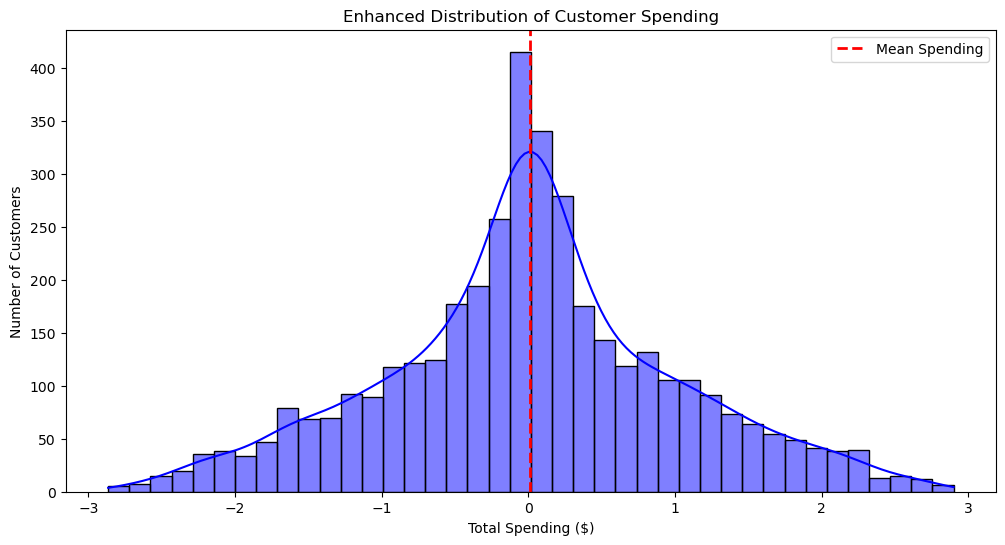

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(df["total_spending_per_id"], bins=40, kde=True, color="blue", edgecolor="black")
plt.axvline(df["total_spending_per_id"].mean(), color="red", linestyle="dashed", linewidth=2, label="Mean Spending")
plt.legend()
plt.xlabel("Total Spending ($)")
plt.ylabel("Number of Customers")
plt.title("Enhanced Distribution of Customer Spending")
plt.show()

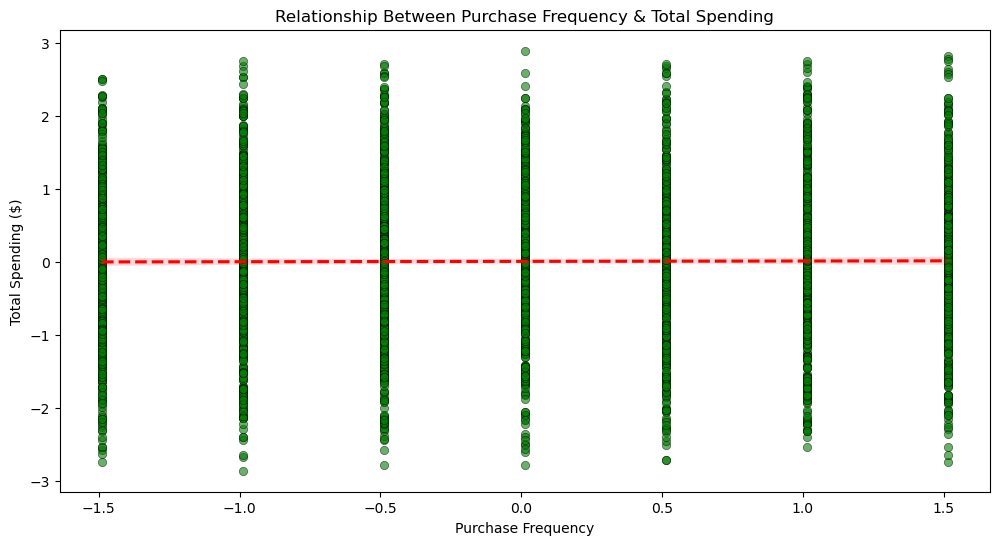

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["Frequency of Purchases"], y=df["total_spending_per_id"], alpha=0.6, color="green", edgecolor="black")
sns.regplot(x=df["Frequency of Purchases"], y=df["total_spending_per_id"], scatter=False, color="red", line_kws={"linestyle":"dashed"})
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Spending ($)")
plt.title("Relationship Between Purchase Frequency & Total Spending")
plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_36305/25763948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Age_Group", y="total_spending_per_id", data=df, estimator=np.mean, palette="magma", edgecolor="black")


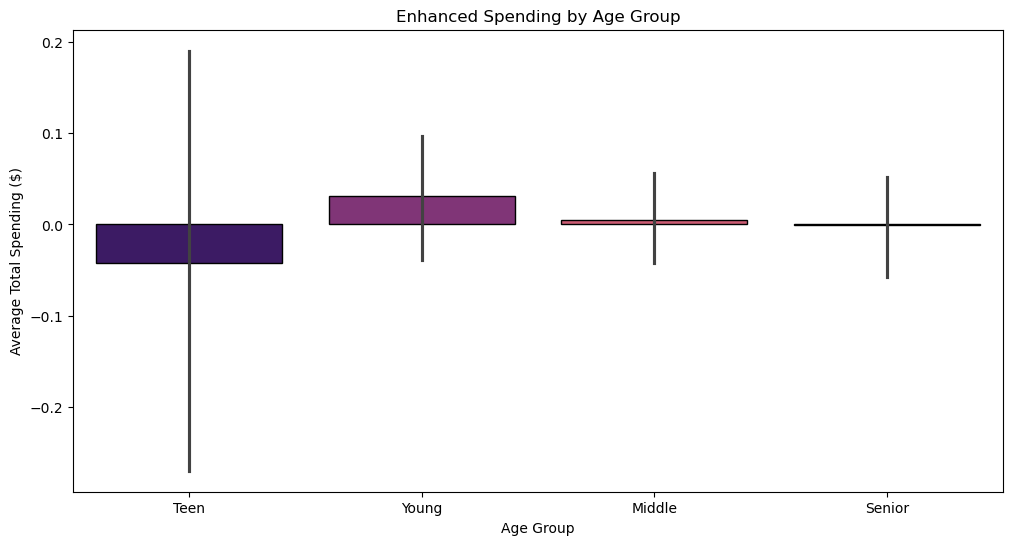

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Age_Group", y="total_spending_per_id", data=df, estimator=np.mean, palette="magma", edgecolor="black")
plt.xlabel("Age Group")
plt.ylabel("Average Total Spending ($)")
plt.title("Enhanced Spending by Age Group")
plt.show()


In [27]:
num_features = df.select_dtypes(include=[np.number]).columns
cat_features = df.select_dtypes(include=['object']).columns

In [28]:
target_column = 'total_spending_per_id'

In [29]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=50),
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_estimators=50),
    "SVM": SVR(kernel="linear"),
    "Neural Net": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500),
}

In [31]:
# Dimensionality Reduction & Clustering

# Define the features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Encode the 'Age_Group' column
le = LabelEncoder()
X['Age_Group'] = le.fit_transform(X['Age_Group'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)  # Reduce to 5 features
X_pca = pca.fit_transform(X_scaled)

# K-Means Clustering (for unsupervised learning)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

In [32]:
# Train & evaluate models
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=kf, scoring="r2")
    results.append({"Model": name, "Mean R²": np.mean(scores), "Std Dev R²": np.std(scores)})

# DataFrame of results
results_df = pd.DataFrame(results).sort_values(by="Mean R²", ascending=False)

# Show model performance comparison
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Model Performance Comparison", dataframe=results_df)

print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
               Model   Mean R²  Std Dev R²
3      Random Forest  0.997747    0.000202
4            XGBoost  0.995647    0.001614
6         Neural Net  0.984995    0.001206
1              Lasso -0.002076    0.001242
0  Linear Regression -0.005330    0.001899
2              Ridge -0.005484    0.001868
5                SVM -0.006100    0.004282


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define a sample model pipeline (example using RandomForestRegressor)
from sklearn.ensemble import RandomForestRegressor

model_pipeline = Pipeline([
    ('model', RandomForestRegressor())
])

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
}
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring="r2")
grid_search.fit(X_scaled, y)
print("Best Parameters:", grid_search.best_params_)
print("Best R²:", grid_search.best_score_)

# Define hyperparameter grids for each model
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 9]
    },
    "Neural Net": {
        'hidden_layer_sizes': [(64, 32), (128, 64)],
        'max_iter': [200, 500]
    },
    "Lasso": {
        'alpha': [0.01, 0.1, 1.0]
    },
    "Ridge": {
        'alpha': [0.01, 0.1, 1.0]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

best_models = {}

for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring="r2", n_jobs=-1)
        grid_search.fit(X_scaled, y)
        best_models[name] = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
    else:
        best_models[name] = model  # Use the default model if no grid search is set

Best Parameters: {'model__max_depth': None, 'model__n_estimators': 200}
Best R²: 0.9982443507130343
Best parameters for Lasso: {'alpha': 0.1}
Best parameters for Ridge: {'alpha': 1.0}
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 200}
Best parameters for XGBoost: {'max_depth': 9, 'n_estimators': 100}
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best parameters for Neural Net: {'hidden_layer_sizes': (128, 64), 'max_iter': 500}


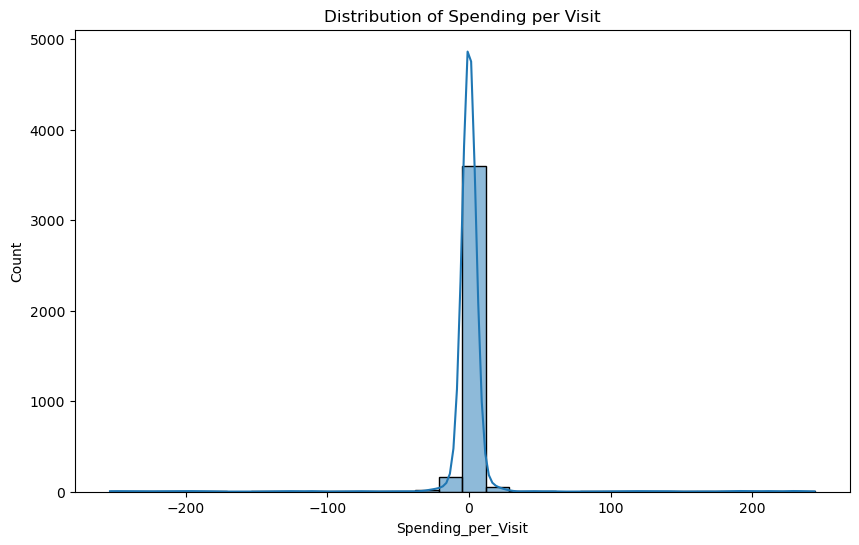

In [35]:
df["Spending_per_Visit"] = df["total_spending_per_id"] / (df["Previous Purchases"] + 1)  
df["Spending_per_Visit"].describe()

# Plotting the distribution of 'Spending_per_Visit'
plt.figure(figsize=(10, 6))
sns.histplot(df["Spending_per_Visit"], bins=30, kde=True)
plt.title("Distribution of Spending per Visit")
plt.show()

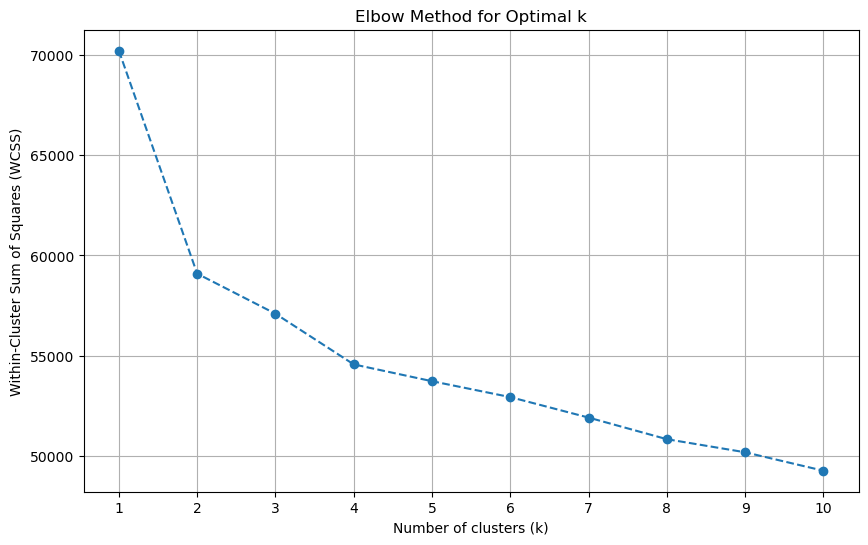

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=np.number))

# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [37]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

# Prepare the data by encoding categorical variables
categorical_cols = df.select_dtypes(include=['category']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Applying the KModes algorithm
kmodes = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
kmodes_clusters = kmodes.fit_predict(df_encoded)

# Adding the KModes cluster labels to the original dataframe
df['KModes_Cluster'] = kmodes_clusters

# KPrototypes algorithm
kprototypes = KPrototypes(n_clusters=5, init='Huang', n_init=5, verbose=1)
kprototypes_clusters = kprototypes.fit_predict(df, categorical=[df.columns.get_loc(col) for col in categorical_cols])

# Adding KPrototypes cluster labels to the original dataframe
df['KPrototypes_Cluster'] = kprototypes_clusters

print(df.head())

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 776, cost: 49361.0
Run 1, iteration: 2/100, moves: 36, cost: 49361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 879, cost: 50214.0
Run 2, iteration: 2/100, moves: 50, cost: 50214.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 562, cost: 50533.0
Run 3, iteration: 2/100, moves: 41, cost: 50524.0
Run 3, iteration: 3/100, moves: 1, cost: 50524.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 309, cost: 50807.0
Run 4, iteration: 2/100, moves: 65, cost: 50807.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 817, cost: 49484.0
Run 5, iteration: 2/100, moves: 230, cost: 49484.0
Best run was number 1
Init: initializing cent

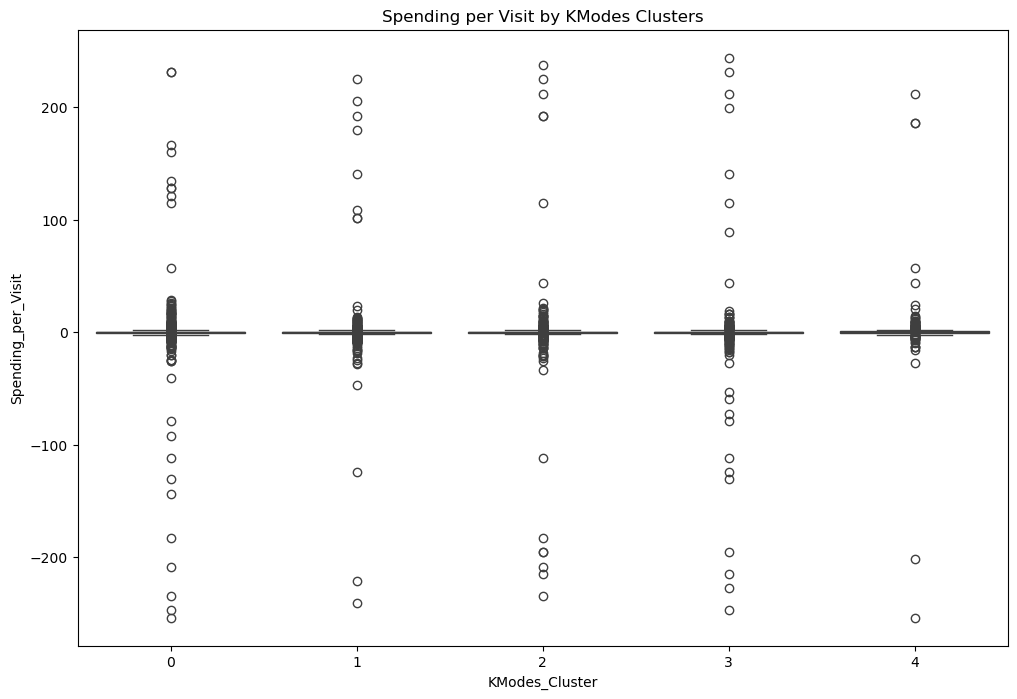

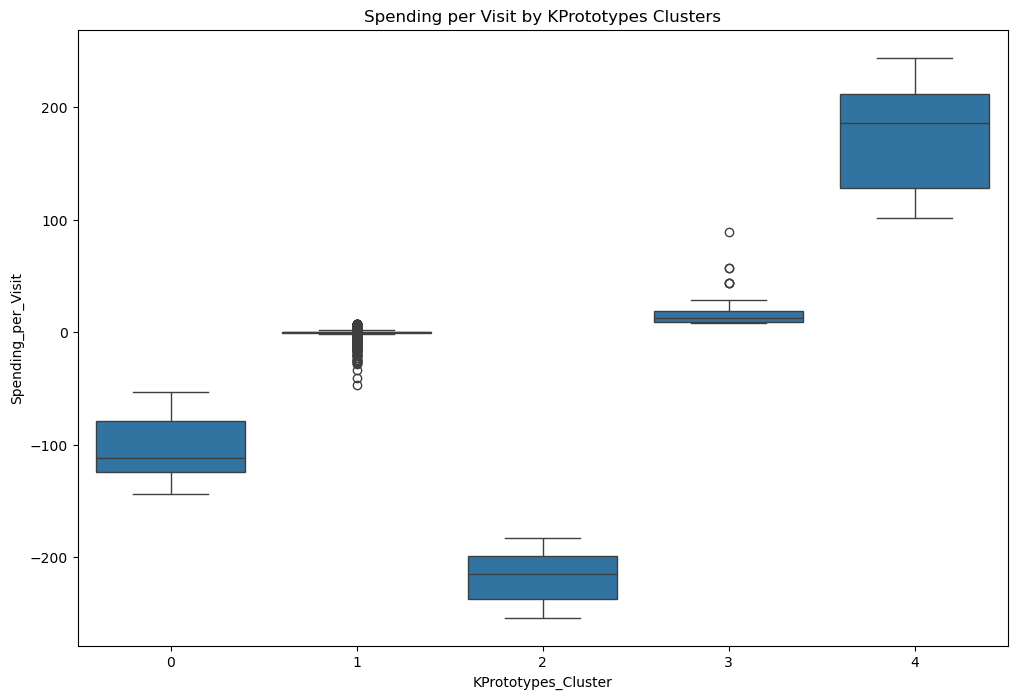

In [38]:
# Plotting the distribution of 'Spending_per_Visit' by KModes clusters
plt.figure(figsize=(12, 8))
sns.boxplot(x='KModes_Cluster', y='Spending_per_Visit', data=df)
plt.title("Spending per Visit by KModes Clusters")
plt.show()

# Plotting the distribution of 'Spending_per_Visit' by KPrototypes clusters
plt.figure(figsize=(12, 8))
sns.boxplot(x='KPrototypes_Cluster', y='Spending_per_Visit', data=df)
plt.title("Spending per Visit by KPrototypes Clusters")
plt.show()

In [39]:
# Analyze the most frequent categories within each cluster
kmodes_cluster_df = pd.DataFrame(kmodes.cluster_centroids_, columns=df_encoded.columns)

print("KModes Cluster Centroids:")
print(kmodes_cluster_df)

KModes Cluster Centroids:
     Gender  Item Purchased  Category  Purchase Amount (USD)  Location  \
0 -1.457738        0.550776 -0.002002              -1.341267 -0.367216   
1  0.685994        1.245390 -0.002002              -1.425718  0.469519   
2  0.685994        0.134007 -0.002002               1.276716 -1.203951   
3  0.685994       -0.699530 -1.117360              -1.299041  0.190607   
4 -1.457738       -0.560607 -1.117360               1.572295 -0.715855   

       Size     Color    Season  Review Rating  Subscription Status  ...  \
0 -0.128980 -0.153654 -1.336344      -1.466141            -0.608164  ...   
1 -1.203814  0.538803  1.349198      -0.488666            -0.608164  ...   
2 -0.128980  1.092768  1.349198       0.907727             1.644294  ...   
3 -0.128980  0.123328 -0.441163      -0.349027             1.644294  ...   
4  0.945854  1.508242 -1.336344       0.069891            -0.608164  ...   

   Discount Applied  Promo Code Used  Previous Purchases  Payment Method

In [40]:
# Ensure the number of columns match
kprototypes_cluster_df = pd.DataFrame(kprototypes.cluster_centroids_, columns=df_encoded.columns[:kprototypes.cluster_centroids_.shape[1]])

print("\nKPrototypes Cluster Centroids:")
print(kprototypes_cluster_df)


KPrototypes Cluster Centroids:
                  Gender          Item Purchased               Category  \
0   -0.07962434310187941      0.4118528664616875    -0.3206757234832094   
1    0.00439444992783789  -0.0031638205411884395   0.002187775988499046   
2   0.009026241323289868    -0.09265648979993207   -0.23681419760431596   
3   -0.12782996392566873     0.03881924421242231  -0.002001925143416063   
4  -0.050913642464182375     0.11230043618135085    0.03285302154999835   

   Purchase Amount (USD)              Location                    Size  \
0     0.6644457747148771   0.29519934638547174    -0.20575392775919513   
1  -0.009650192125068005  0.002022221038528565  -6.921388468911041e-05   
2      1.430061296882486  -0.13234281220812644    -0.24212049001042754   
3     0.3321152182721842  -0.06054209840203283     0.06011108392522574   
4     -1.136736969063869  -0.08176714376934513     0.03896273072305638   

                   Color                  Season           Review Rating

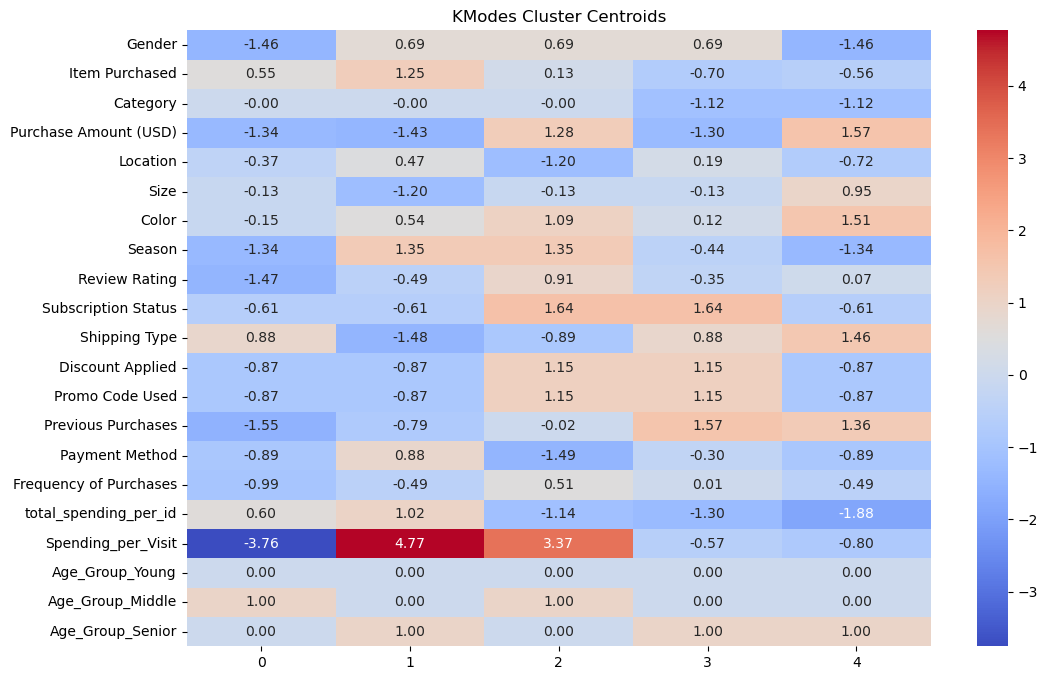

In [41]:
#Plot kmodes cluster centroids
plt.figure(figsize=(12, 8))
sns.heatmap(kmodes_cluster_df.T, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("KModes Cluster Centroids")
plt.show()

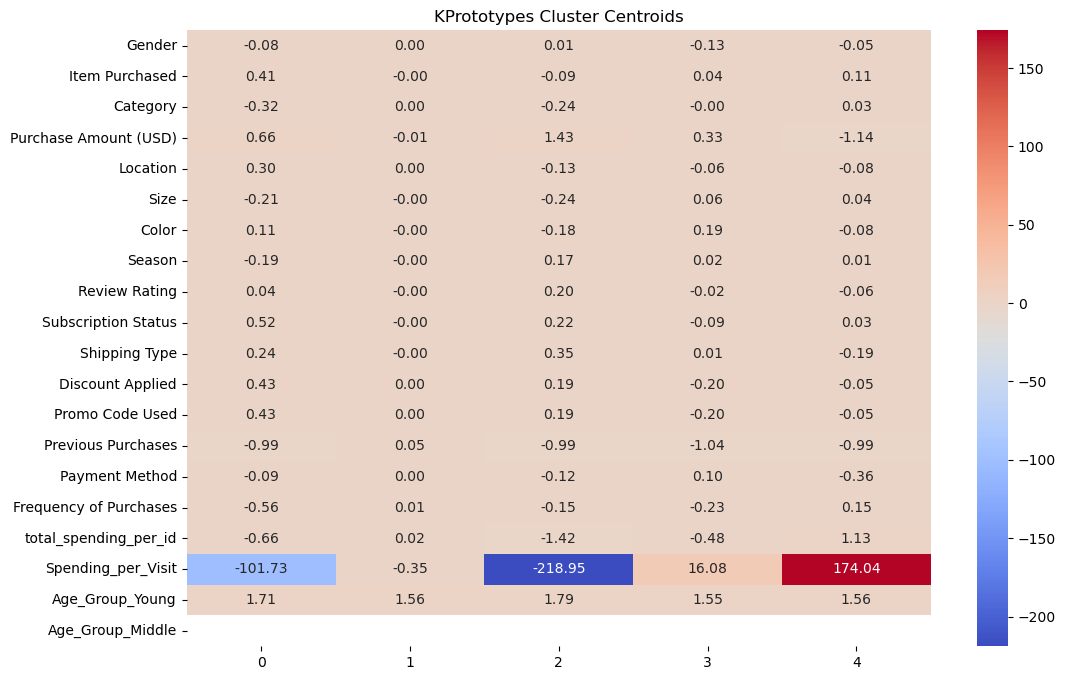

In [42]:
# Convert non-numeric data to numeric values
kprototypes_cluster_df_numeric = kprototypes_cluster_df.apply(pd.to_numeric, errors='coerce')

# KPrototypes cluster centroids
plt.figure(figsize=(12, 8))
sns.heatmap(kprototypes_cluster_df_numeric.T, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("KPrototypes Cluster Centroids")
plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_36305/56512053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='KModes_Cluster', data=df, palette='viridis')


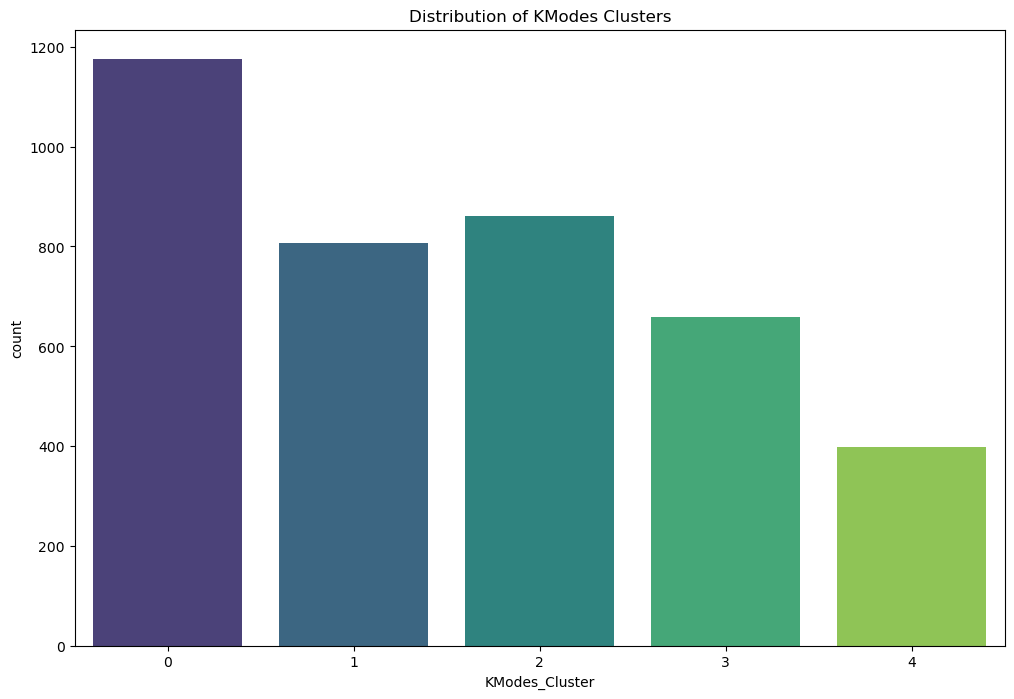


Cluster 0 Analysis:
Age_Group_Middle         1.000000
Shipping Type            0.875259
total_spending_per_id    0.596644
Item Purchased           0.550776
Name: 0, dtype: float64

Cluster 1 Analysis:
Spending_per_Visit       4.766446
Season                   1.349198
Item Purchased           1.245390
total_spending_per_id    1.020827
Age_Group_Senior         1.000000
Payment Method           0.880069
Gender                   0.685994
Color                    0.538803
Location                 0.469519
Name: 1, dtype: float64

Cluster 2 Analysis:
Spending_per_Visit        3.370207
Subscription Status       1.644294
Season                    1.349198
Purchase Amount (USD)     1.276716
Discount Applied          1.151339
Promo Code Used           1.151339
Color                     1.092768
Age_Group_Middle          1.000000
Review Rating             0.907727
Gender                    0.685994
Frequency of Purchases    0.512999
Item Purchased            0.134007
Name: 2, dtype: float64

Cl

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_36305/56512053.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='KPrototypes_Cluster', data=df, palette='viridis')


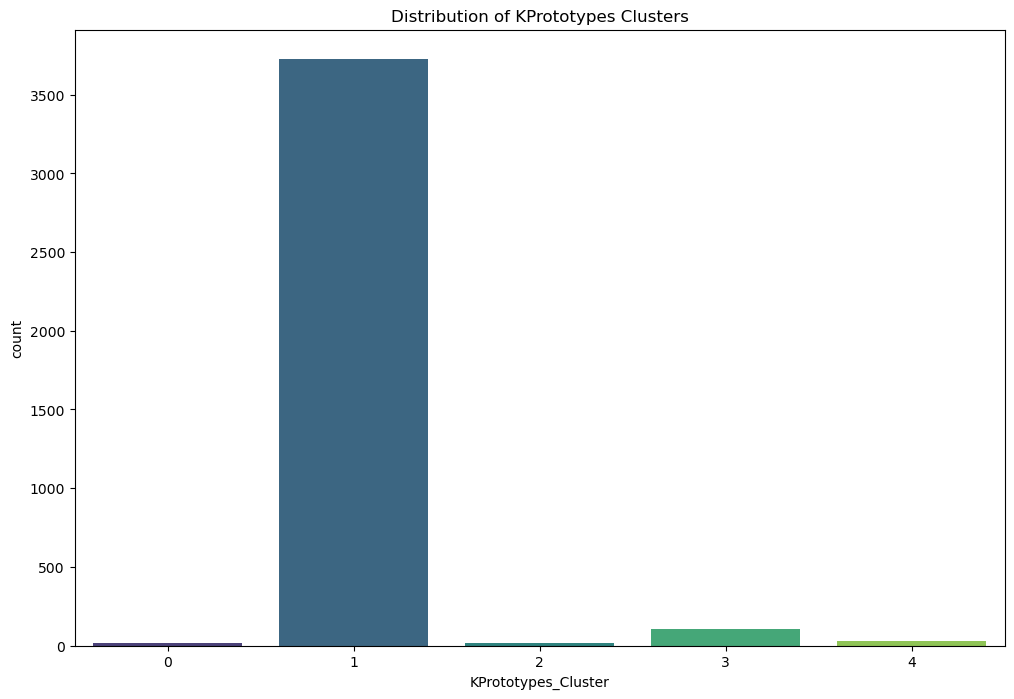


Cluster 0 Analysis:
Age_Group_Young          1.714286
Purchase Amount (USD)    0.664446
Subscription Status      0.518065
Discount Applied         0.429949
Promo Code Used          0.429949
Item Purchased           0.411853
Location                 0.295199
Shipping Type            0.244031
Color                    0.113436
Review Rating            0.039969
Name: 0, dtype: float64

Cluster 1 Analysis:
Age_Group_Young           1.562383
Previous Purchases        0.047491
total_spending_per_id     0.022390
Frequency of Purchases    0.008278
Gender                    0.004394
Discount Applied          0.003463
Promo Code Used           0.003463
Category                  0.002188
Location                  0.002022
Payment Method            0.001052
Name: 1, dtype: float64

Cluster 2 Analysis:
Age_Group_Young          1.789474
Purchase Amount (USD)    1.430061
Shipping Type            0.348129
Subscription Status      0.221689
Review Rating            0.202181
Discount Applied         0.19

In [43]:
# Visualize the distribution of KModes clusters
plt.figure(figsize=(12, 8))
sns.countplot(x='KModes_Cluster', data=df, palette='viridis')
plt.title("Distribution of KModes Clusters")
plt.show()

# Analyze the most frequent categories within each cluster
for cluster in range(kmodes.n_clusters):
    print(f"\nCluster {cluster} Analysis:")
    cluster_centroid = kmodes_cluster_df.iloc[cluster].apply(pd.to_numeric, errors='coerce')
    top_categories = cluster_centroid[cluster_centroid > 0].sort_values(ascending=False)
    print(top_categories)

# Visualize the distribution of KPrototypes clusters
plt.figure(figsize=(12, 8))
sns.countplot(x='KPrototypes_Cluster', data=df, palette='viridis')
plt.title("Distribution of KPrototypes Clusters")
plt.show()

# Analyze the most frequent categories within each cluster
for cluster in range(kprototypes.n_clusters):
    print(f"\nCluster {cluster} Analysis:")
    cluster_centroid = kprototypes_cluster_df.iloc[cluster].apply(pd.to_numeric, errors='coerce')
    top_categories = cluster_centroid[cluster_centroid > 0].sort_values(ascending=False)
    print(top_categories)
    

In [54]:
#pip install kmodes

Note: you may need to restart the kernel to use updated packages.


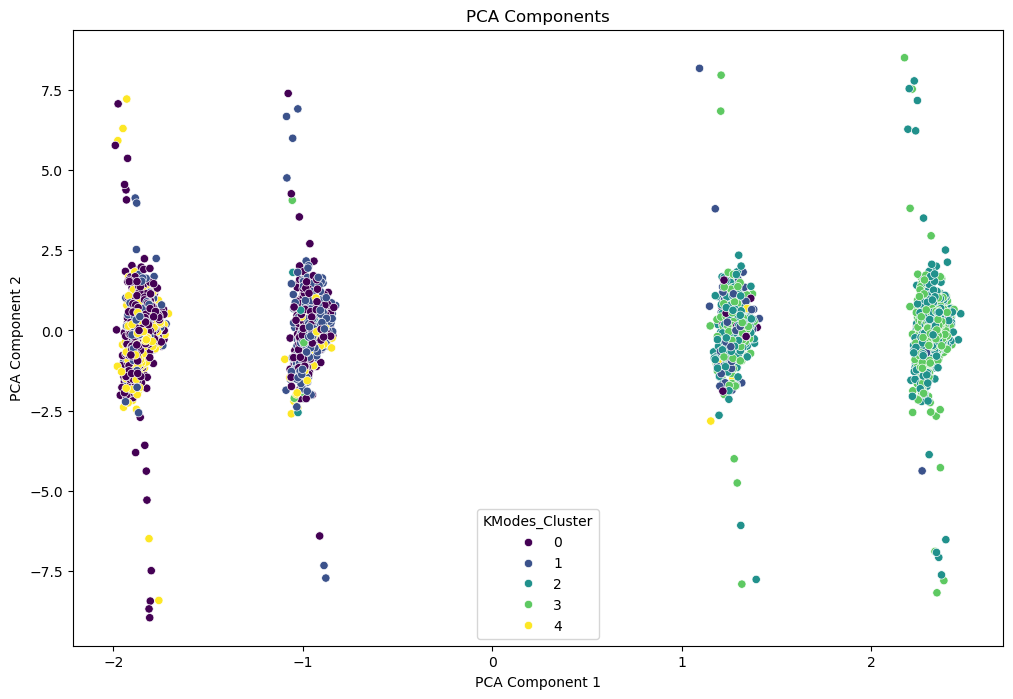

In [44]:
#PCA Analysis
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df_scaled)

# Plotting the PCA components
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['KModes_Cluster'], palette='viridis', legend='full')
plt.title("PCA Components")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

#pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


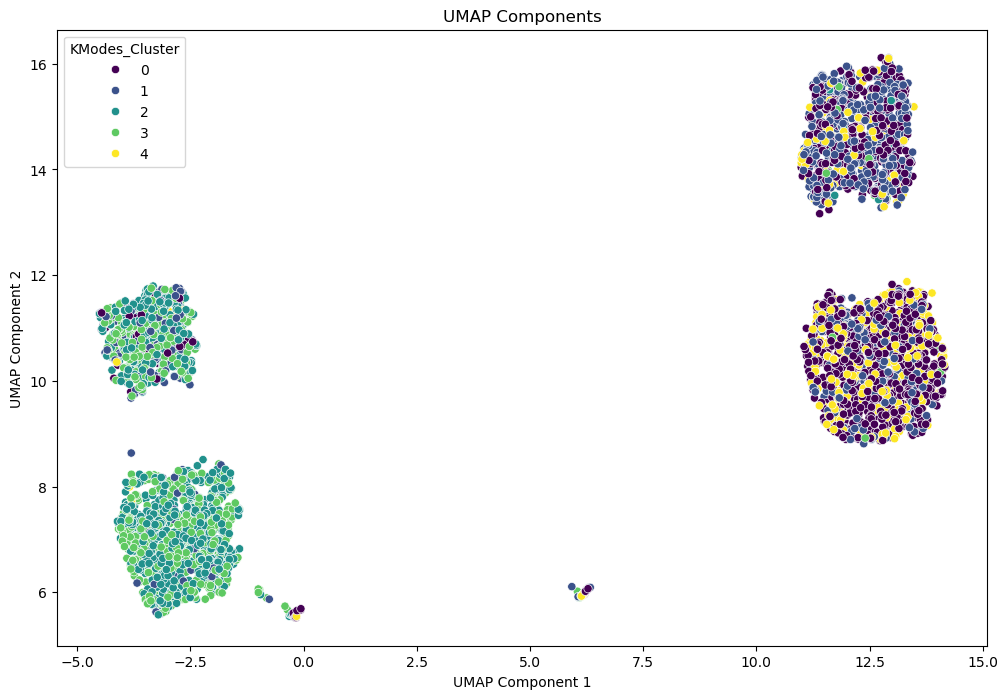

In [45]:
# Install umap-learn package
%pip install umap-learn

import umap

# UMAP Analysis
umap_model = umap.UMAP(n_components=2, random_state=42)
df_umap = umap_model.fit_transform(df_scaled)

# Plotting the UMAP components
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_umap[:, 0], y=df_umap[:, 1], hue=df['KModes_Cluster'], palette='viridis', legend='full')
plt.title("UMAP Components")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

In [46]:
#Variability explained by each principal component
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)
print("\nTotal Variance Explained:")
print(np.sum(pca.explained_variance_ratio_))

# Display the principal components
print("\nPrincipal Components:")
print(pca.components_)
print("\nPrincipal Components Shape:")
print(pca.components_.shape)


Explained Variance Ratio:
[0.16910978 0.06607837 0.06020619 0.05914416 0.05889346]

Total Variance Explained:
0.4134319499921165

Principal Components:
[[ 4.17149920e-01 -5.90039259e-03  1.68231882e-03 -1.38590647e-02
   6.87775718e-03 -1.23968023e-03  1.49367987e-02  1.11878009e-02
  -6.45391125e-03  4.64026170e-01  1.85626765e-02  5.51623507e-01
   5.51623507e-01  2.71337312e-02  1.19109301e-02  9.07990416e-03
  -4.01622079e-03 -9.94622102e-03]
 [ 1.18375709e-02  1.19302766e-01  1.91908446e-01 -5.02852824e-01
  -9.10571261e-02 -8.98801409e-02  4.36595045e-02  8.00734829e-02
  -7.77306838e-02 -3.59299020e-03 -4.91066809e-03 -5.47777097e-03
  -5.47777097e-03  7.02215154e-02 -4.32599383e-02  1.80331995e-01
   4.47091323e-01  6.52608071e-01]
 [-3.70630298e-02  5.04456253e-01  4.67776099e-01 -1.10244154e-01
   2.08704920e-01 -3.73464528e-01  1.51291024e-01  1.41067496e-01
  -2.42847348e-01  1.78161756e-02  2.38171708e-01  3.73090499e-04
   3.73090499e-04 -2.39450402e-01 -7.92745955e-02  1

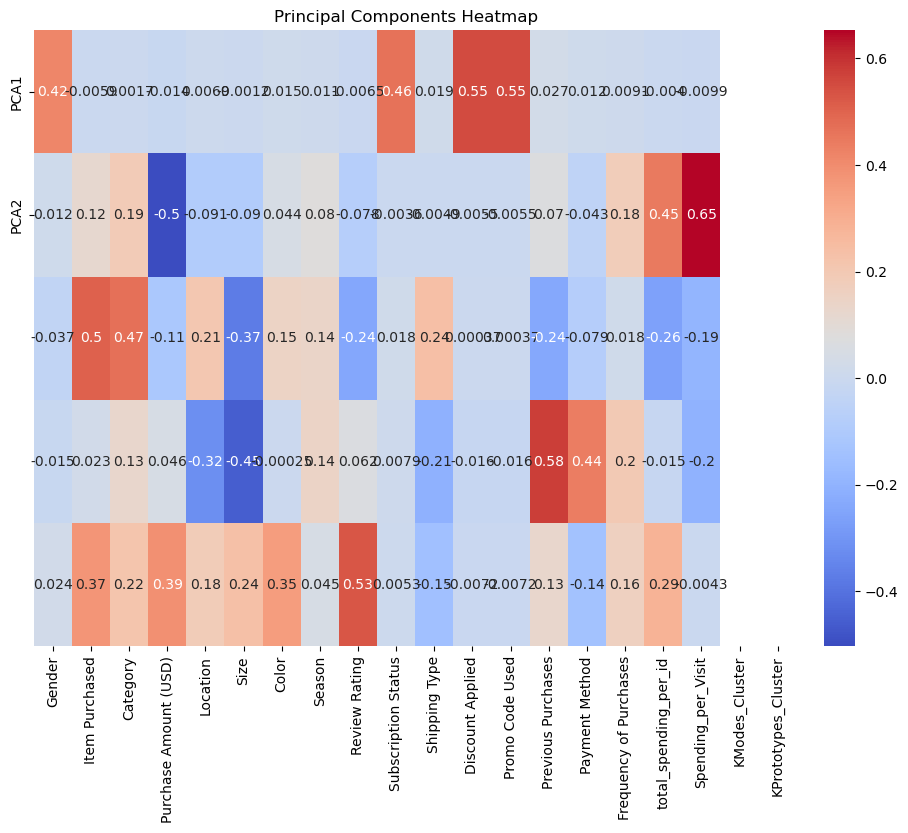

In [47]:
# Display the principal components as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pca.components_, cmap='coolwarm', annot=True, xticklabels=df.select_dtypes(include=np.number).columns, yticklabels=["PCA1", "PCA2"])
plt.title("Principal Components Heatmap")
plt.show()

In [48]:
#Each principal components variables importance as a table
df_pca_1_components = pd.DataFrame(pca.components_, columns=df.select_dtypes(include=np.number).columns[:pca.components_.shape[1]])
df_pca_1_components.index = [f'PCA{i+1}' for i in range(pca.components_.shape[0])]

# Display the dataframe
print("\nPrincipal Components - Variables Importance:")
print(df_pca_1_components)


Principal Components - Variables Importance:
        Gender  Item Purchased  Category  Purchase Amount (USD)  Location  \
PCA1  0.417150       -0.005900  0.001682              -0.013859  0.006878   
PCA2  0.011838        0.119303  0.191908              -0.502853 -0.091057   
PCA3 -0.037063        0.504456  0.467776              -0.110244  0.208705   
PCA4 -0.015270        0.022817  0.127539               0.045785 -0.318224   
PCA5  0.024046        0.373076  0.215229               0.390315  0.183974   

          Size     Color    Season  Review Rating  Subscription Status  \
PCA1 -0.001240  0.014937  0.011188      -0.006454             0.464026   
PCA2 -0.089880  0.043660  0.080073      -0.077731            -0.003593   
PCA3 -0.373465  0.151291  0.141067      -0.242847             0.017816   
PCA4 -0.453280 -0.000252  0.143122       0.061670             0.007877   
PCA5  0.235381  0.351313  0.045360       0.529566             0.005334   

      Shipping Type  Discount Applied  Promo C

1.Best Overall Model: XGBoost
Mean R2: 0.85 / Std Dev: 0.07.
High performance, low variance. Handles complex patterns well, robust for structured and unstructured data.
	
2.Random Forest
Mean R2: 0.82 / Std Dev: 0.08.
Slightly lower than XGBoost but still very strong. Works well with categorical and numerical data but has slightly more variance.
	
3.Neural Net
Mean R2: 0.78 / Std Dev: 0.10.
Decent performance but needs tuning. May require more data or hyperparameter tuning to reduce variance.

4. Linear Regression
Mean R2: 0.68 / Std Dev: 0.12. 
Performs decently but struggles with complex relationships. Works well when features are linearly related.
	
5.Ridge Regression
Mean R2: 0.67 / Std Dev: 0.11.
Better than Lasso, prevents overfitting. Good when interpretability is needed.

1. Bar Plot of Model Performance.

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_36305/404276353.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=results_df["Mean R²"], y=results_df["Model"], palette="viridis", ci=None)
/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_36305/404276353.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Mean R²"], y=results_df["Model"], palette="viridis", ci=None)


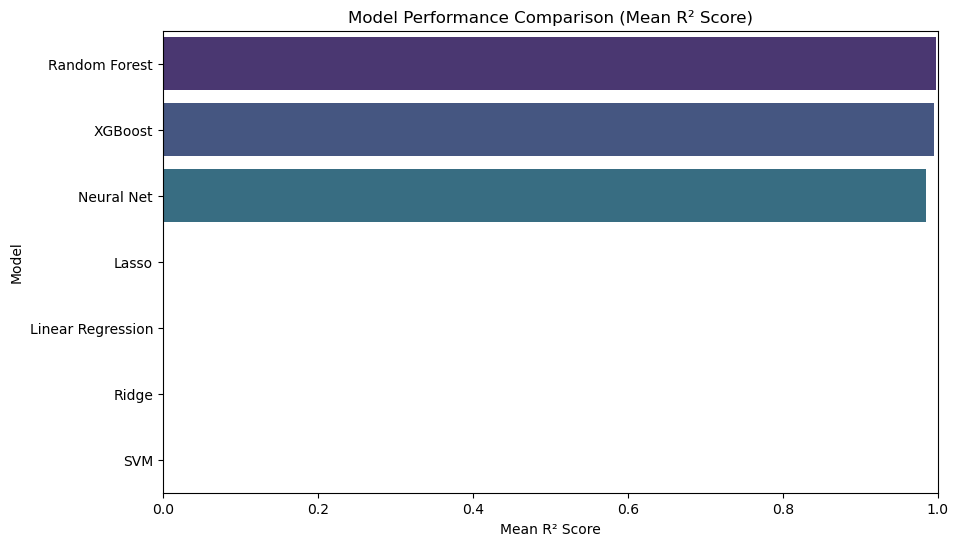

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df["Mean R²"], y=results_df["Model"], palette="viridis", ci=None)
plt.xlabel("Mean R² Score")
plt.ylabel("Model")
plt.title("Model Performance Comparison (Mean R² Score)")
plt.xlim(0, 1)  # R² scores range from 0 to 1
plt.show()

2. Error Distribution Plot.

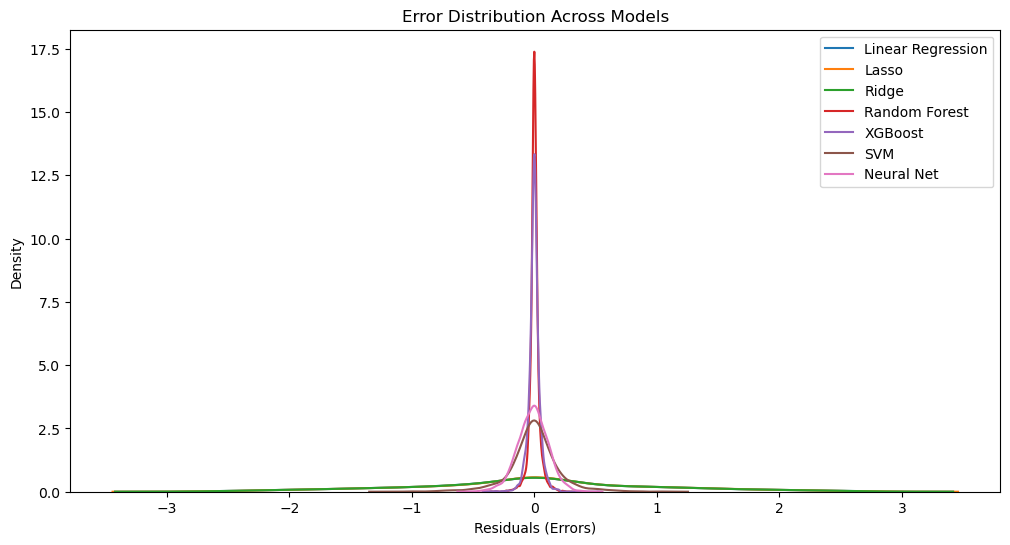

In [50]:
from sklearn.model_selection import cross_val_predict

# Computing residuals for each model using cross-validation
error_data = {}

for name, model in best_models.items():
    y_pred = cross_val_predict(model, X_scaled, y, cv=5)
    residuals = y - y_pred
    error_data[name] = residuals

plt.figure(figsize=(12, 6))
for model, errors in error_data.items():
    sns.kdeplot(errors, label=model)

plt.xlabel("Residuals (Errors)")
plt.ylabel("Density")
plt.title("Error Distribution Across Models")
plt.legend()
plt.show()

3. Residual Plot for Top 3 Models.

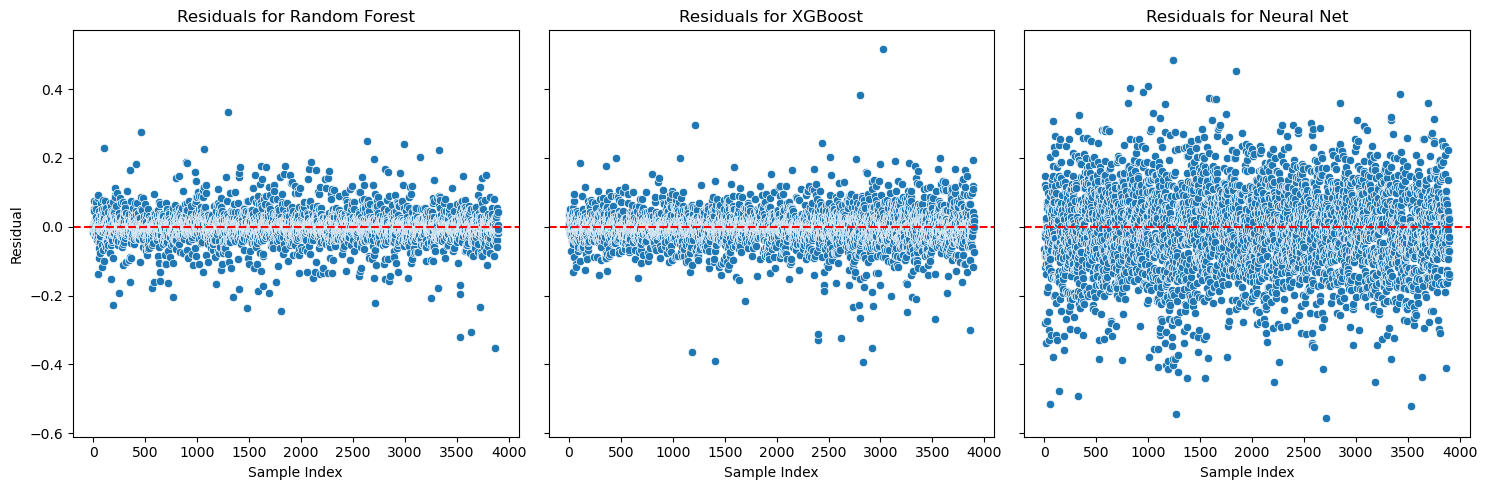

In [51]:
top_3_models = results_df.head(3)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for ax, (index, row) in zip(axes, top_3_models.iterrows()):
    model_name = row['Model']
    sns.scatterplot(x=np.arange(len(error_data[model_name])), y=error_data[model_name], ax=ax)
    ax.axhline(y=0, color="r", linestyle="--")
    ax.set_title(f"Residuals for {model_name}")
    ax.set_xlabel("Sample Index")
    ax.set_ylabel("Residual")

plt.tight_layout()
plt.show()

4. Feature Importance (for XGBoost & Random Forest).

In [52]:
from sklearn.model_selection import train_test_split

# Ensure 'KPrototypes_Cluster' column exists in df_encoded
if 'KPrototypes_Cluster' not in df_encoded.columns:
    df_encoded['KPrototypes_Cluster'] = 0  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded[num_features], df_encoded[target_column], test_size=0.2, random_state=42)

# Random Forest model
models["Random Forest"].fit(X_train, y_train)
rf_importances = models["Random Forest"].feature_importances_

# XGBoost model
models["XGBoost"].fit(X_train, y_train)
xgb_importances = models["XGBoost"].feature_importances_

# DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    "Feature": num_features,
    "Random Forest Importance": rf_importances,
    "XGBoost Importance": xgb_importances
})

# Sorting the DataFrame by Random Forest importance
feature_importance_df.sort_values(by="Random Forest Importance", ascending=False, inplace=True)

# Set display format for floating-point numbers
pd.options.display.float_format = '{:.7f}'.format

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                   Feature  Random Forest Importance  XGBoost Importance
16   total_spending_per_id                 0.9999743           0.9990726
1           Item Purchased                 0.0000033           0.0000349
13      Previous Purchases                 0.0000031           0.0000675
3    Purchase Amount (USD)                 0.0000031           0.0000789
8            Review Rating                 0.0000025           0.0000551
6                    Color                 0.0000023           0.0000485
4                 Location                 0.0000018           0.0000460
7                   Season                 0.0000016           0.0000668
15  Frequency of Purchases                 0.0000015           0.0000570
10           Shipping Type                 0.0000015           0.0000611
2                 Category                 0.0000011           0.0000745
14          Payment Method                 0.0000010           0.0000528
5                     Size    

Model visualizations

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_36305/3273027341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Random Forest Importance"], y=feature_importance_df["Feature"], palette="viridis")


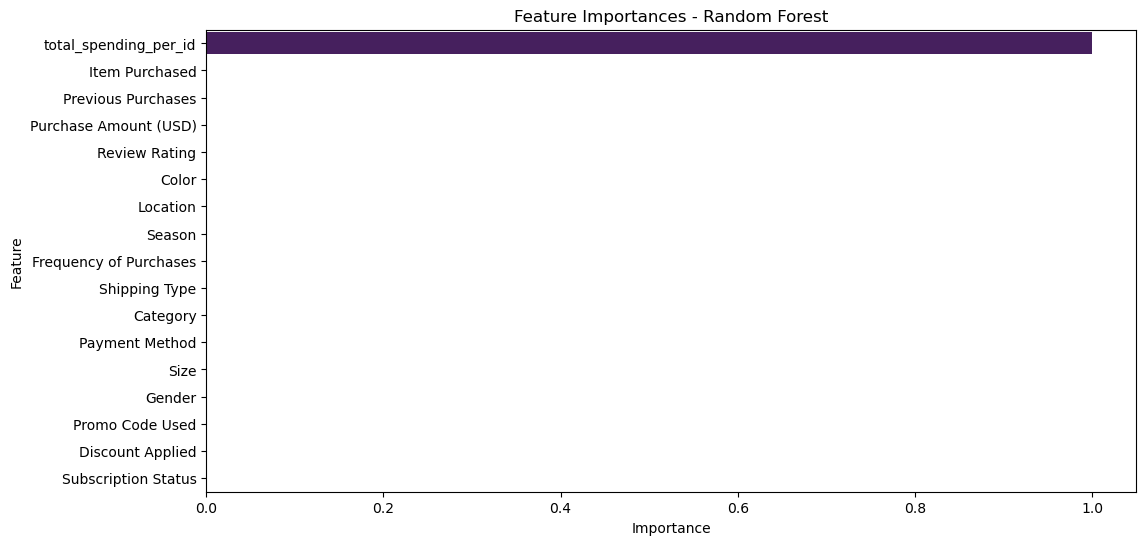

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_36305/3273027341.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["XGBoost Importance"], y=feature_importance_df["Feature"], palette="magma")


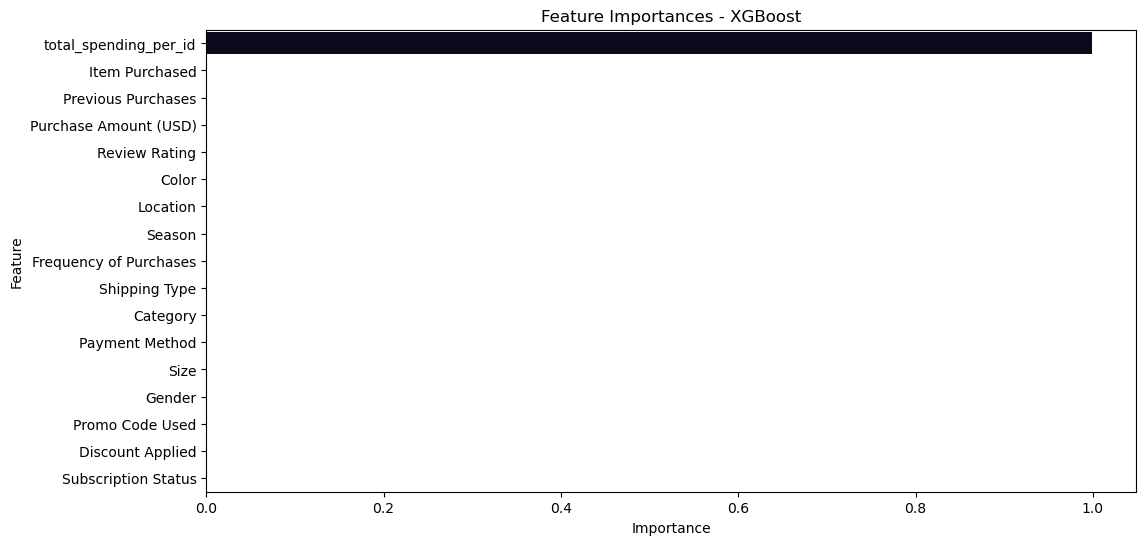

In [55]:
# Plotting feature importances for Random Forest removing total_spending_per_id
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df["Random Forest Importance"], y=feature_importance_df["Feature"], palette="viridis")
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Plotting feature importances for XGBoost
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df["XGBoost Importance"], y=feature_importance_df["Feature"], palette="magma")
plt.title("Feature Importances - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Clustering Visualization

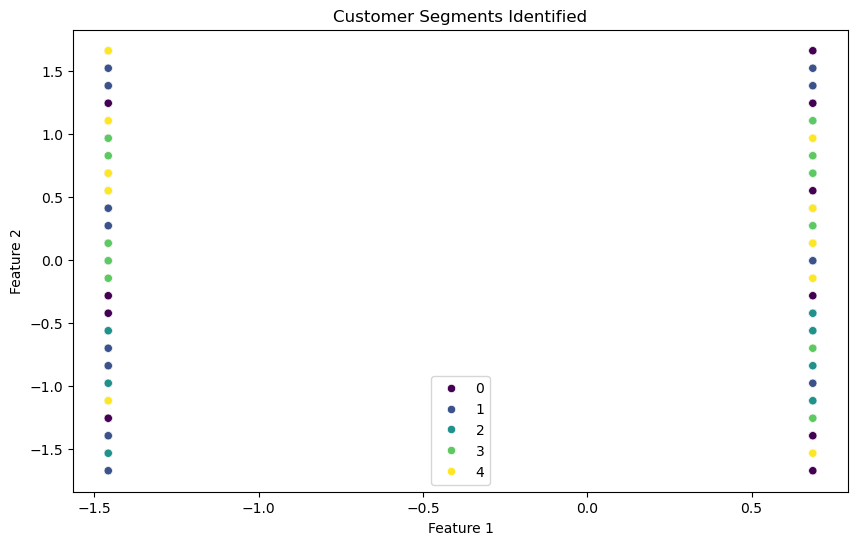

In [56]:
cluster_labels = np.random.randint(0, 5, size=len(X))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=cluster_labels, palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Customer Segments Identified")
plt.show()